# Objective: Create plots of stellar mass vs. conditional mass function

In [58]:
import os

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clip']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [60]:
from astropy.io.ascii import read
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
import fitsio
import seaborn

In [61]:
# Reading in the RedMaPPer iSEDfit catalog.
rmpath = os.path.join(os.sep, 'global', 'work', 'projects', 'redmapper')
rmcatfile = os.path.join(rmpath, 'redmapper_isedfit_v5.10_centrals.fits.gz')
rminfo = fitsio.FITS(rmcatfile)
rmcat = rminfo[1].read(columns=['Z', 'MSTAR_50', 'ILUM', 'LAMBDA_CHISQ', 'P_CEN', 'P_SAT', 'MSTAR_AVG'])

In [62]:
masses = {}

In [63]:
def indhist(data, bounds):
    catalog = data
    indices = np.where((catalog >= bounds[0]) * (catalog <= bounds[1]))[0]
    return indices

In [64]:
def getdata(physics):
    for jj in range(numslices):
        physics[jj+1] = indhist(rmcat['MSTAR_AVG'][keep], [masschunks[1][jj], masschunks[1][jj+1]])
    return;

In [169]:
# Convert dictionary to matrix
def dicttomatrix(dictionary):
    dataarray = []
    for ii in range(numslices):
        dataarray.append(list(dictionary.items())[ii][1])
    return dataarray

In [68]:
# This function accepts two 1x2 arrays. The first is the richness bounds. The second is the redshift bounds.
def cutter(lbounds, zbounds):
    keep = np.where((rmcat['LAMBDA_CHISQ'] > lbounds[0]) * (rmcat['LAMBDA_CHISQ'] < lbounds[1]) * 
                    (rmcat['Z'] > zbounds[0]) * (rmcat['Z'] < zbounds[1]))[0]
    return keep

In [69]:
# Goal: Create some clean subplots, reminiscent of those in the paper (but better).
# How do I compute the Conditional Mass Function (CMF)?
# Create little slices of richness and redshift.
# Compute the volume of the little slices of Z, RA, Dec.
# Figure out which sources are in each slice.
# Compute the CMF of each slice of heavenly goodness.
# Plot CMF vs. M*.

In [217]:
numslices = 12

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


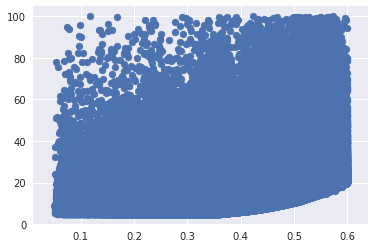

In [222]:
keep = cutter([0, 100], [0, 1])
fig, ax = plt.subplots()
ax.scatter(rmcat['Z'][keep], rmcat['LAMBDA_CHISQ'][keep])

## Computing the Conditional Mass Function

$$ \Phi = \Phi_C + \Phi_S $$

$$ \Phi_C(M) = \frac{\Sigma_{i \in clusters} \Sigma_{j \in galaxies \, in \, i}p_{cen,j}}{N_{cl}\Delta\log M} $$

$$ \Phi_S(M) = \frac{\Sigma_{i \in clusters} \Sigma_{j \in galaxies \, in \, i}p_{mem,j}(1-p_{cen,j})}{N_{cl}\Delta\log M} $$

This just means add up the component for each galaxy in each cluster... Very pain-in-the-ass notation.

Map richness to M500

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


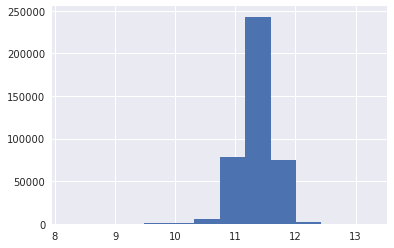

In [223]:
masssep = np.linspace(min(rmcat['MSTAR_AVG'][keep]), max(rmcat['MSTAR_AVG'][keep]), numslices)
mdiff = masssep[1]-masssep[0]
# Do I need to index based on mass too?... Make a damn histogram!
masschunks = plt.hist(rmcat['MSTAR_AVG'][keep], bins=numslices)

In [224]:
getdata(masses)
massarray = dicttomatrix(masses)

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


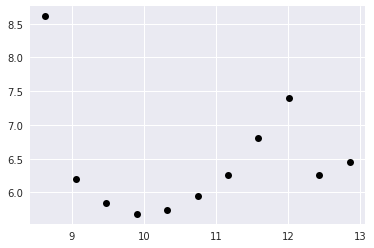

In [239]:
plt.figure()
for ii in range(1, numslices):
    if len(massarray[ii] > 0):
        phic = np.sum(rmcat['P_CEN'][massarray[ii]])/(len(massarray[ii])*mdiff)
        phis = np.sum(rmcat['P_SAT'][massarray[ii]])/(len(massarray[ii])*mdiff)
        phi = phic + phis 
        plt.plot(masschunks[1][ii], phi, 'ko')

In [229]:
print(massarray)

[array([  1652,  78396, 243223]), array([  2816,  15157, 124545, 128676]), array([   861,  10792,  23349,  57565,  64801,  72443,  80091,  87146,
       101346, 111195, 112187, 116581, 119776, 120697, 126678, 137747,
       171420, 178290, 179358, 186146, 192257, 196198, 211518, 216374,
       221454, 230573, 231755, 232878, 233398, 237800, 244114, 245912,
       251152, 263761, 268488, 284013, 290034, 293403, 298304, 298588,
       300908, 308092, 336557, 342042, 345123, 350525, 355367, 355808,
       356778, 360135, 360779, 369396, 372774, 390442, 394877, 398586,
       401740, 405451]), array([   303,   1097,   1681,   3300,  12520,  15224,  16847,  17514,
        20104,  21275,  21406,  31166,  33279,  36624,  36909,  37564,
        37759,  38551,  38633,  39307,  47570,  50037,  52462,  53390,
        54315,  54546,  54885,  57027,  57375,  60228,  60344,  64232,
        67140,  68073,  68934,  69519,  73528,  74423,  74929,  77630,
        79671,  81629,  82918,  83920,  84214,  

In [235]:
print(np.sum(rmcat['P_SAT'][massarray[ii]])/(len(massarray[ii])*mdiff))
print(np.sum(rmcat['P_CEN'][massarray[ii]])/(len(massarray[ii])*mdiff))

4.28255368326
2.1724059022
